<a href="https://colab.research.google.com/github/Ayakhaled200/ML-Models/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files   #salary dataset
import pandas as pd

# Upload the dataset
uploaded = files.upload()

# Read the dataset into a Pandas DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"Dataset '{filename}' loaded successfully.")

# Now you can work with the DataFrame 'df'
# For example, you can display the first few rows:


Saving Salary.csv to Salary.csv
Dataset 'Salary.csv' loaded successfully.


In [2]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Salary'])  # Drop the target column from features
y = df['Salary']  # Target column

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24, 1)
X_test shape: (6, 1)
y_train shape: (24,)
y_test shape: (6,)


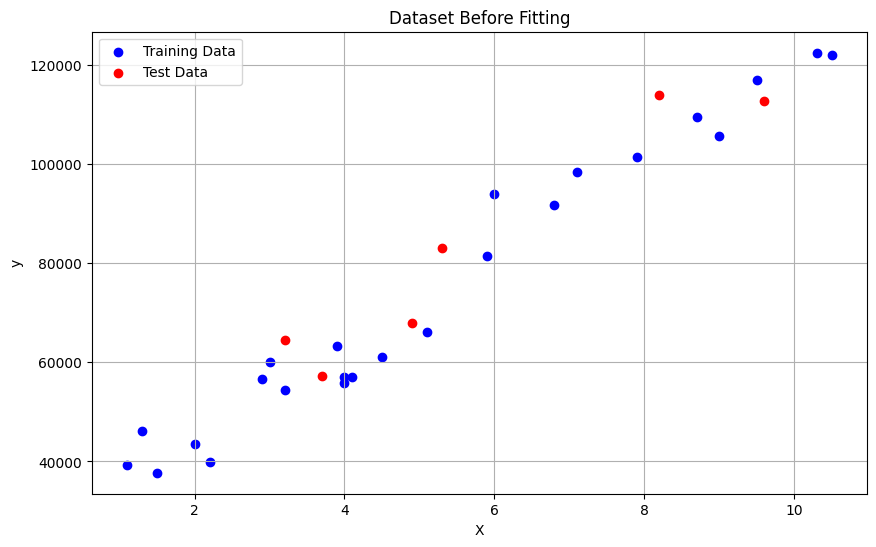

In [6]:
import matplotlib.pyplot as plt

# Plotting the dataset before fitting the model
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.title('Dataset Before Fitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import numpy as np

def h(theta0, theta1, x1):
    ypredict = theta0 + theta1 * x1
    return ypredict

def update_parameters(theta0, theta1, ypred, yhat, X, learning_rate):
    num_samples = len(X)
    # Compute gradients
    dtheta1 = (1 / num_samples) * np.sum((ypred - yhat) * X)
    dtheta0 = (1 / num_samples) * np.sum(ypred - yhat)
    # Update parameters
    theta1 -= learning_rate * dtheta1
    theta0 -= learning_rate * dtheta0
    return theta0, theta1

def fit(X_train, y_train, num_iterations, learning_rate):
    num_samples, num_features = X_train.shape
    theta1 = np.zeros(1)
    theta0 = 0

    for _ in range(num_iterations):
        for j in range(num_features):
            y_pred = h(theta0, theta1, X_train[:, j])
            theta0, theta1 = update_parameters(theta0, theta1, y_pred, y_train, X_train[:, j], learning_rate)

    return theta0, theta1

# Assuming X_train and y_train are your training data
# X_train should be a 2D array with shape (num_samples, num_features)
# y_train should be a 1D array with shape (num_samples,)
# y_train should be a 1D array with shape (num_samples,)
X_train = np.array(X_train)  # Example training data with one feature
y_train = np.array(y_train)  # Example target variable

num_iterations = 1000
learning_rate = 0.01

# Example usage:
bias, weights = fit(X_train, y_train, num_iterations, learning_rate)
print("Bias:", bias)
print("Weights:", weights)

y_pred = h(bias, weights, X_test)


y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# Calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return 1 - np.mean(np.abs(y_pred - y_true) / y_true)

accuracy = calculate_accuracy(y_test, y_pred)
print("Accuracy:", accuracy)


Bias: 22997.421972034434
Weights: [9768.48083188]
Accuracy: 0.9222887244375325


In [10]:
# THE Same Model But in one class
import numpy as np

class Linear_Regression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta0 = None
        self.theta1 = None
        self.ypred = 0


    def h(self, x1):   #hypothesis function (predict)
        self.ypred = self.theta0 + self.theta1 * x1
        return self.ypred

    def update_parameters(self, yhat, X):
        num_samples = len(X)
        # Compute gradients
        dtheta1 = (1 / num_samples) * np.sum((self.ypred - yhat) * X)
        dtheta0 = (1 / num_samples) * np.sum(self.ypred - yhat)
        # Update parameters
        self.theta1 -= self.learning_rate * dtheta1
        self.theta0 -= self.learning_rate * dtheta0
        return self.theta0, self.theta1

    def fit(self, X_train, y_train):
        num_samples, num_features = X_train.shape
        self.theta1 = np.zeros(1)
        self.theta0 = 0

        for _ in range(self.num_iterations):
            for j in range(num_features):
                y_pred = self.h(X_train[:, j])
                theta0, theta1 = self.update_parameters(y_train, X_train[:, j])

        return self.theta0, self.theta1


# Example usage
if __name__ == "__main__":

    # Assuming you have already split your data into training and testing sets (X_train, y_train, X_test, y_test)

    # Initialize and fit the model
    model = Linear_Regression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_test = model.h(X_test)

    # Calculate accuracy
    def calculate_accuracy(y_true, y_pred):
        y_true = np.array(y_true).flatten()  # Convert to 1D array
        y_pred = np.array(y_pred).flatten()  # Convert to 1D array
        return 1 - np.mean(np.abs(y_pred - y_true) / y_true)

accuracy = calculate_accuracy(y_test, y_pred_test)
print("Accuracy:", accuracy)


Accuracy: 0.9222887244375325


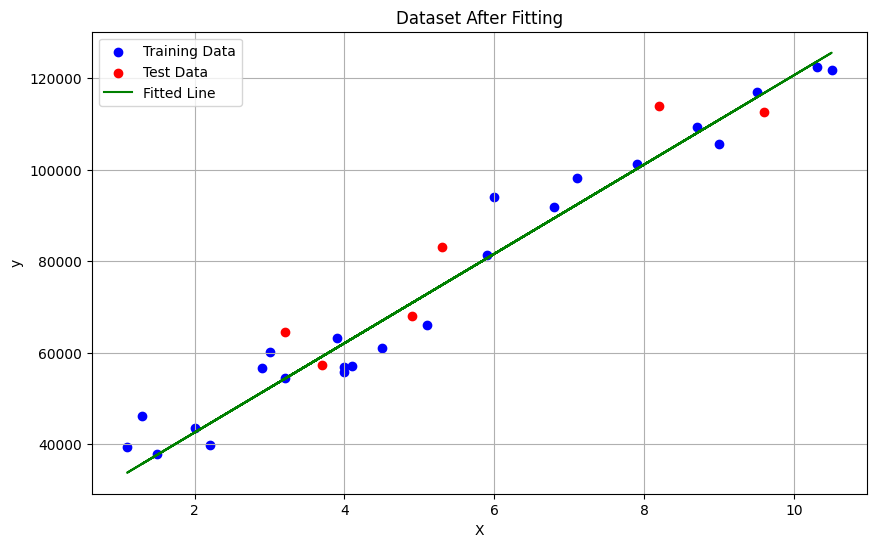

In [11]:
y_pred_train = model.h(X_train)

# Plotting the dataset after fitting the model
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_pred_train, color='green', label='Fitted Line')
plt.title('Dataset After Fitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

Mean Absolute Error (Train): 4221.046734449738
Mean Absolute Error (Test): 6286.453830757749
Mean Squared Error (Train): 27102249.73126139
Mean Squared Error (Test): 49830096.85590839
R-squared (Train): 0.9645401573418146
R-squared (Test): 0.9024461774180497


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
